<a href="https://colab.research.google.com/github/rokzeezee/Machine-Learning-/blob/main/BTC_PREDICTION_WITH_FACEBOOK_PROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [144]:
df = pd.read_csv("/content/BTC-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3252,2023-08-13,29416.593750,29441.433594,29265.806641,29282.914063,29282.914063,7329897180
3253,2023-08-14,29283.263672,29660.253906,29124.105469,29408.443359,29408.443359,14013695304
3254,2023-08-15,29408.048828,29439.121094,29088.853516,29170.347656,29170.347656,12640195779
3255,2023-08-16,29169.074219,29221.976563,28701.779297,28701.779297,28701.779297,14949271904


In [112]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [145]:
df["Date"] = df["Date"].apply(lambda x : datetime.datetime.strptime(x , "%Y-%m-%d"))

In [146]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3252,2023-08-13,29416.593750,29441.433594,29265.806641,29282.914063,29282.914063,7329897180
3253,2023-08-14,29283.263672,29660.253906,29124.105469,29408.443359,29408.443359,14013695304
3254,2023-08-15,29408.048828,29439.121094,29088.853516,29170.347656,29170.347656,12640195779
3255,2023-08-16,29169.074219,29221.976563,28701.779297,28701.779297,28701.779297,14949271904


In [135]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3.257000e+03
mean,13804.685411,14136.633475,13441.627824,13811.922809,13811.922809,1.652624e+10
std,16014.785297,16410.488128,15563.369477,16011.971486,16011.971486,1.941161e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,773.023010,777.989990,765.411987,773.872009,773.872009,1.341270e+08
50%,7826.901367,8062.167969,7613.040039,7833.040039,7833.040039,1.048079e+10
75%,20817.982422,21360.875000,20397.000000,20836.328125,20836.328125,2.726580e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [136]:
df.shape

(3257, 7)

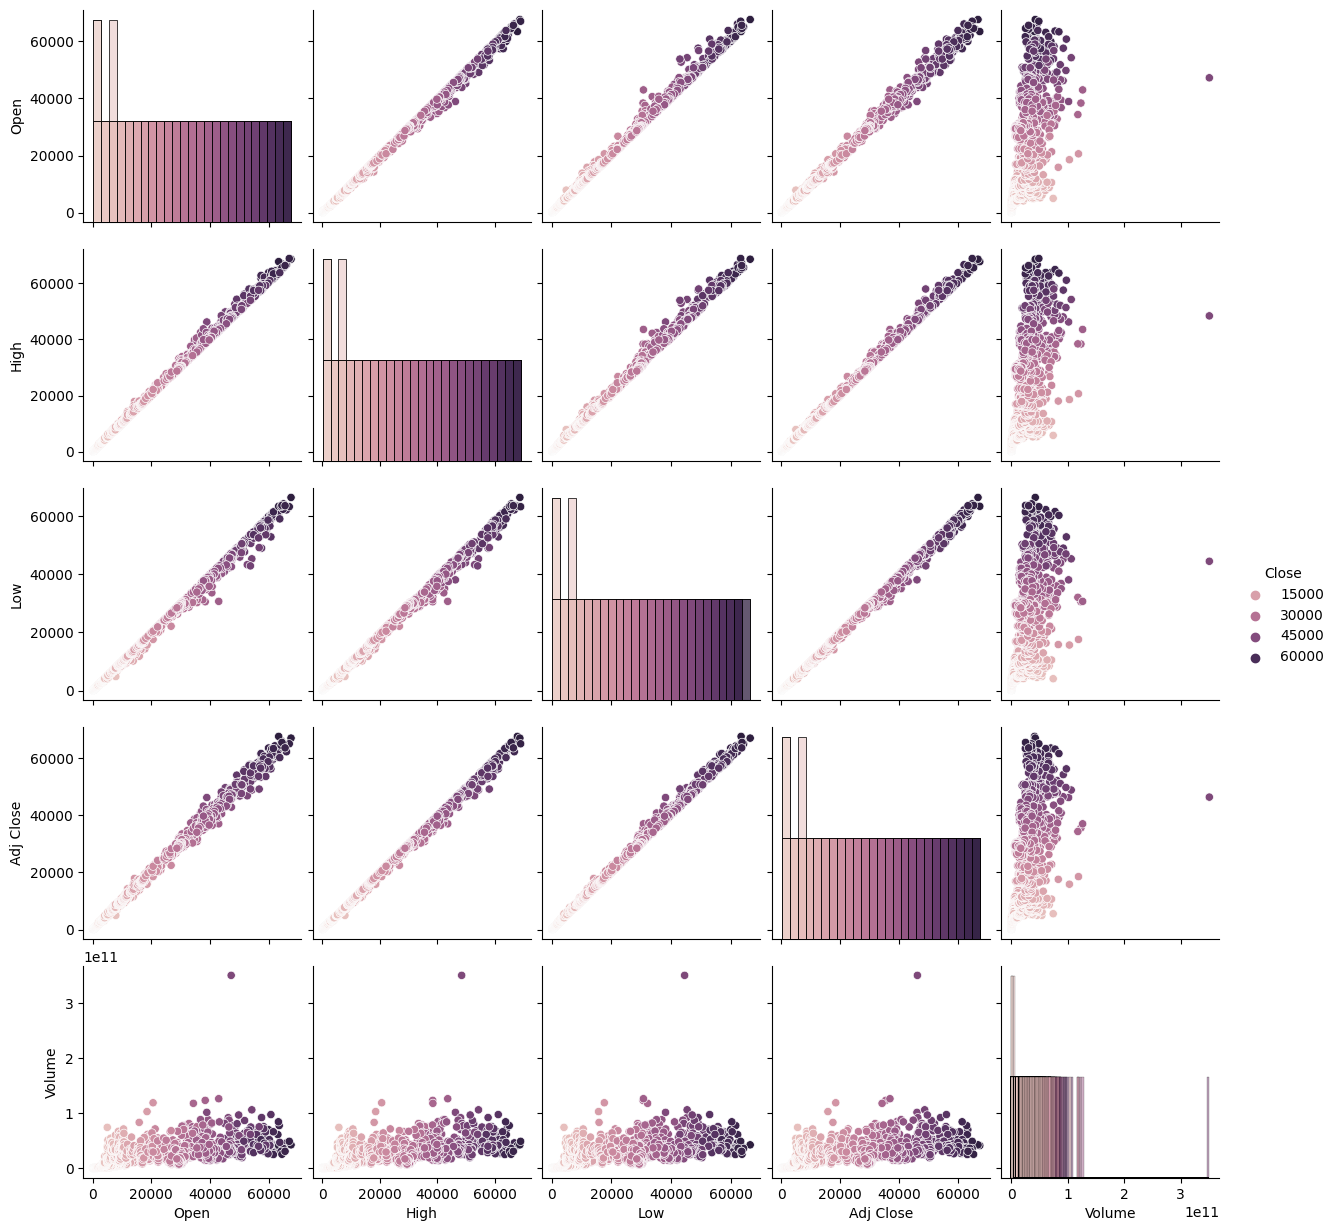

In [ ]:
sns.pairplot(df , hue = "Close" ,  diag_kind="hist")

In [116]:
df.corr()

<ipython-input-116-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999501,0.999104,0.998800,0.998800,0.697888
High,0.999501,1.000000,0.998974,0.999461,0.999461,0.702562
Low,0.999104,0.998974,1.000000,0.999363,0.999363,0.688914
Close,0.998800,0.999461,0.999363,1.000000,1.000000,0.696611
Adj Close,0.998800,0.999461,0.999363,1.000000,1.000000,0.696611
Volume,0.697888,0.702562,0.688914,0.696611,0.696611,1.000000


In [132]:
df

In [147]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [148]:
df=df[['Date', #'Open', 'High', 'Low',
   'Close',
   #'Adj Close', 'Volume'
   ]].copy()

In [149]:
df=df.rename(columns={"Date" : "ds " , 'Close' : 'y'} )


In [150]:
df

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3252,2023-08-13,29282.914063
3253,2023-08-14,29408.443359
3254,2023-08-15,29170.347656
3255,2023-08-16,28701.779297


In [189]:
last =df[len(df)-20:]
last

,ds,y
3217,2023-07-09,30171.234375
3218,2023-07-10,30414.470703
3219,2023-07-11,30620.951172
3220,2023-07-12,30391.646484
3221,2023-07-13,31476.048828
3222,2023-07-14,30334.068359
3223,2023-07-15,30295.806641
3224,2023-07-16,30249.132813
3225,2023-07-17,30145.888672
3226,2023-07-18,29856.562500


In [158]:
last.to_csv("LAST.csv")

In [152]:
train =df[:-20]
train

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3232,2023-07-24,29176.916016
3233,2023-07-25,29227.390625
3234,2023-07-26,29354.972656
3235,2023-07-27,29210.689453


In [169]:

from prophet import Prophet


In [164]:
m = Prophet(daily_seasonality= True)


In [166]:
train.to_csv("train.csv")
train

,Unnamed: 0,ds,y
0,0,2014-09-17,457.334015
1,1,2014-09-18,424.440002
2,2,2014-09-19,394.795990
3,3,2014-09-20,408.903992
4,4,2014-09-21,398.821014
...,...,...,...
3232,3232,2023-07-24,29176.916016
3233,3233,2023-07-25,29227.390625
3234,3234,2023-07-26,29354.972656
3235,3235,2023-07-27,29210.689453


In [168]:
df =train[[#'Unnamed: 0',
  'ds ', 'y']].copy()

In [172]:
df.columns =["ds" ,"y"]

In [173]:
df

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3232,2023-07-24,29176.916016
3233,2023-07-25,29227.390625
3234,2023-07-26,29354.972656
3235,2023-07-27,29210.689453


In [174]:
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxuyiks80/45mbeejq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxuyiks80/qjmidudw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20571', 'data', 'file=/tmp/tmpxuyiks80/45mbeejq.json', 'init=/tmp/tmpxuyiks80/qjmidudw.json', 'output', 'file=/tmp/tmpxuyiks80/prophet_modelfmhsle5k/prophet_model-20230817144538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [178]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3597,2024-07-23
3598,2024-07-24
3599,2024-07-25
3600,2024-07-26
3601,2024-07-27


In [180]:
forecast = m.predict(future)
forecast
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,350.082655,-7647.173936,4876.796346,350.082655,350.082655,-2116.339857,-2116.339857,-2116.339857,-398.065914,...,28.573577,28.573577,28.573577,-1746.847520,-1746.847520,-1746.847520,0.0,0.0,0.0,-1766.257202
1,2014-09-18,351.193768,-8119.723761,4589.982407,351.193768,351.193768,-2192.025320,-2192.025320,-2192.025320,-398.065914,...,-12.770313,-12.770313,-12.770313,-1781.189093,-1781.189093,-1781.189093,0.0,0.0,0.0,-1840.831552
2,2014-09-19,352.304881,-8315.993061,4990.812524,352.304881,352.304881,-2203.821531,-2203.821531,-2203.821531,-398.065914,...,4.862169,4.862169,4.862169,-1810.617786,-1810.617786,-1810.617786,0.0,0.0,0.0,-1851.516649
3,2014-09-20,353.415995,-8602.999322,4385.181651,353.415995,353.415995,-2241.709695,-2241.709695,-2241.709695,-398.065914,...,-8.705077,-8.705077,-8.705077,-1834.938705,-1834.938705,-1834.938705,0.0,0.0,0.0,-1888.293700
4,2014-09-21,354.527108,-8575.734840,4634.084384,354.527108,354.527108,-2261.012513,-2261.012513,-2261.012513,-398.065914,...,-8.971395,-8.971395,-8.971395,-1853.975205,-1853.975205,-1853.975205,0.0,0.0,0.0,-1906.485406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,2024-07-23,363.377954,-11984.956019,10245.165384,-8346.315375,9049.809224,-1434.976362,-1434.976362,-1434.976362,-398.065914,...,-3.291777,-3.291777,-3.291777,-1033.618671,-1033.618671,-1033.618671,0.0,0.0,0.0,-1071.598408
3598,2024-07-24,318.482736,-12434.861125,9423.230206,-8440.322680,9043.607019,-1420.520188,-1420.520188,-1420.520188,-398.065914,...,28.573577,28.573577,28.573577,-1051.027851,-1051.027851,-1051.027851,0.0,0.0,0.0,-1102.037453
3599,2024-07-25,273.587518,-12848.648404,9891.351582,-8541.356888,9058.041347,-1479.814907,-1479.814907,-1479.814907,-398.065914,...,-12.770313,-12.770313,-12.770313,-1068.978680,-1068.978680,-1068.978680,0.0,0.0,0.0,-1206.227389
3600,2024-07-26,228.692299,-12878.522110,9678.853837,-8654.264982,9111.424487,-1479.892954,-1479.892954,-1479.892954,-398.065914,...,4.862169,4.862169,4.862169,-1086.689209,-1086.689209,-1086.689209,0.0,0.0,0.0,-1251.200654


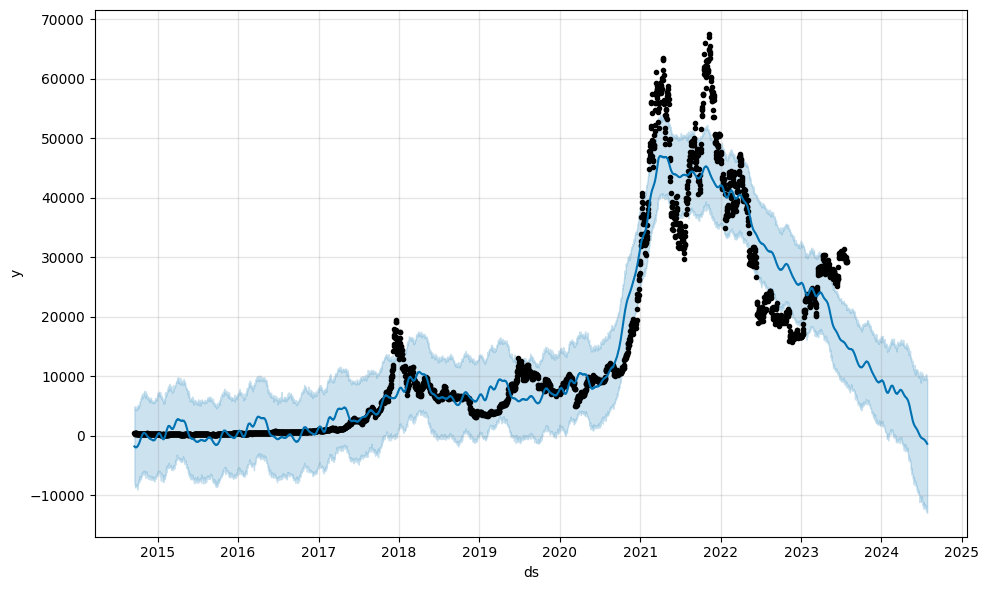

In [181]:
fig1 = m.plot(forecast)


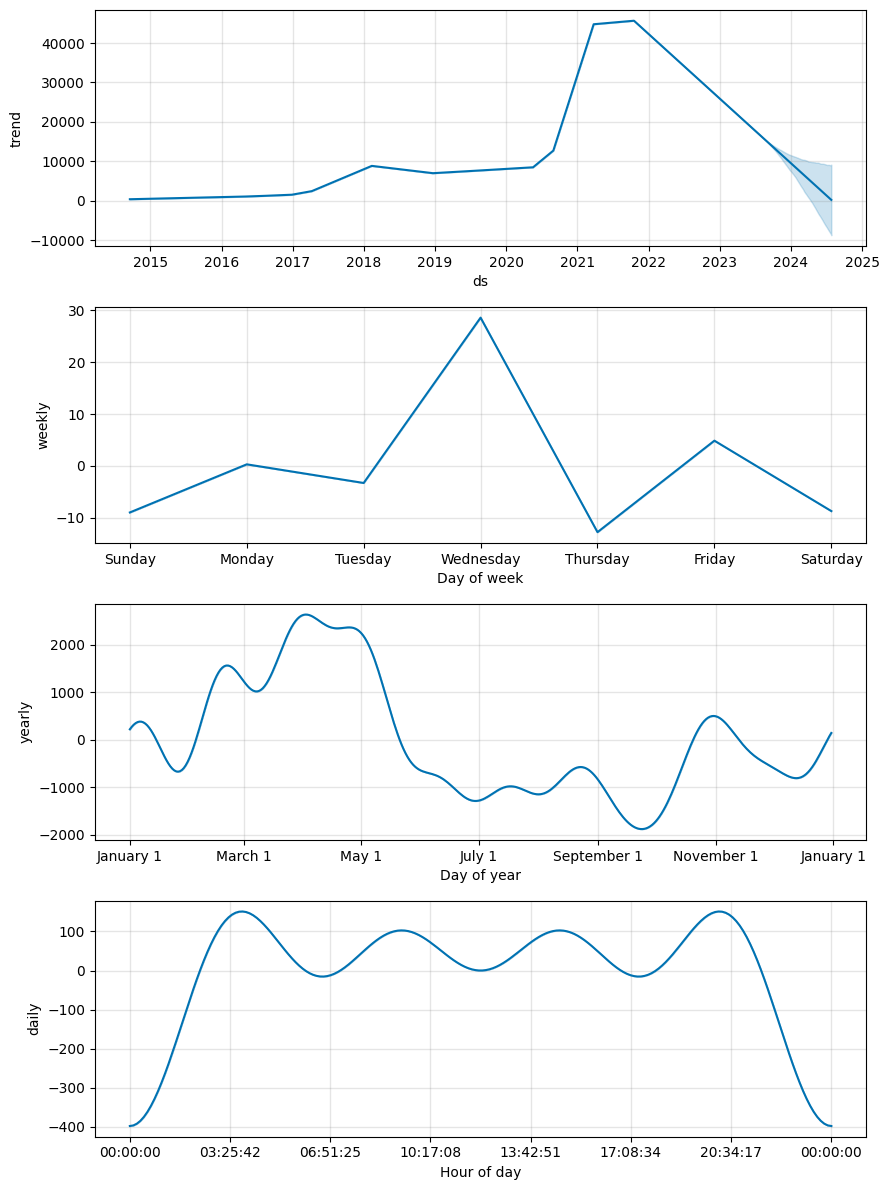

In [182]:
fig2 = m.plot_components(forecast)


In [183]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [184]:
plot_components_plotly(m, forecast)


In [185]:
forecast[forecast.ds ==" 2023-07-28" ]["yhat"]

3236    15070.05754
Name: yhat, dtype: float64

In [190]:
last[last.ds == "2023-07-28"]["y"]

3236    29319.246094
Name: y, dtype: float64